### Descente de gradient

In [16]:
import matplotlib
matplotlib.__version__

'3.4.3'

In [17]:
from math import pow
def f(x):
    return pow(x,4) - 11 * pow(x,3) + 41 * pow(x, 2) - 61 * x + 30

In [18]:
def fprime(x):
    return 4 * pow(x,3) - 33 * pow(x,2) + 82 * x - 61

In [19]:
def tangente(x0, x):
    y = fprime(x0) * (x - x0) + f(x0)
    return y

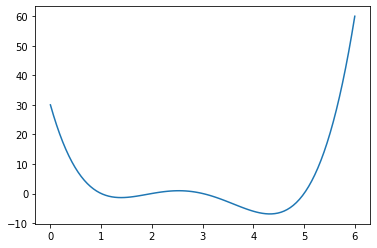

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 6, 100)
y = [f(x[i]) for i in range(len(x))]
plt.plot(x, y)

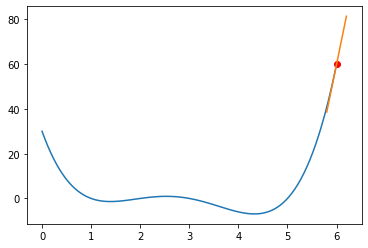

In [21]:
#Avec un seul point :
x0  = 6
Ix = np.linspace(x0 - .2, x0 + .2, 10)
d_tang0 = [Ix, [tangente(x0, Ix[i]) for i in range(len(Ix))]]
#print(d_tang[0], d_tang[1])
plt.plot(x,y)
plt.scatter(x0, f(x0), c ='r')
plt.plot(d_tang0[0], d_tang0[1])

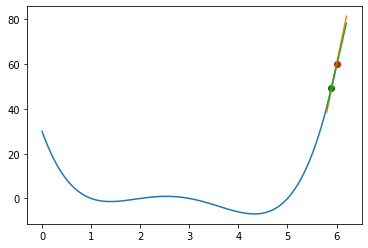

In [22]:
#avec deux points
nu = .001
x1  = x0 - nu * fprime(x0)
Ix = np.linspace(x0 - .2, x0 + .2, 10)
d_tang1 = [Ix, [tangente(x1, Ix[i]) for i in range(len(Ix))]] 
plt.plot(x,y)
plt.scatter(x0, f(x0), c ='r')
plt.plot(d_tang0[0], d_tang0[1])
plt.scatter(x1, f(x1), c ='g')
plt.plot(d_tang1[0], d_tang1[1])

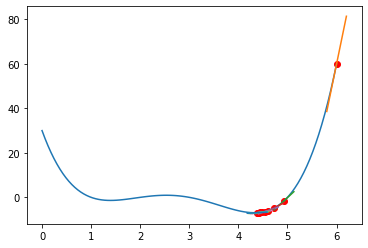

In [23]:
from time import sleep
#généralisons :
plt.plot(x,y)

K = 10
nu = .01
x_current = 6
while(K > 0):
    #sleep(1)
    I = np.linspace(x_current - .2, x_current + .2, 10)
    d_tang = [I, [tangente(x_current, I[i]) for i in range(len(I))]] 
    plt.scatter(x_current, f(x_current), c ='r')
    plt.plot(d_tang[0], d_tang[1])
    x_current = x_current - nu * fprime(x_current)
    K -=1

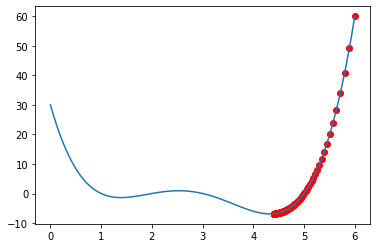

In [24]:
#Pour voir tout ça en animé : 
import matplotlib.animation as animation

#On commence par créer les points : 
points_x = []
points_y = []
K = 100
nu = .001
x_current = 6
while(K > 0):
    points_x.append(x_current)
    points_y.append(f(x_current))
    x_current = x_current - nu * fprime(x_current)
    K -=1
plt.plot(x, y)
plt.scatter(points_x, points_y, c = 'r')

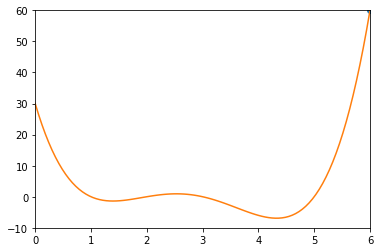

In [30]:
# Création de la figure et de l'axe

fig, ax = plt.subplots()

# Création de la ligne qui sera mise à jour au fur et à mesure
line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

#Gestion des limites de la fenêtre
ax.set_xlim([0, 6])
ax.set_ylim([-10, 60])


# Création de la function qui sera appelée à "chaque nouvelle image"
def animate(k):
    plt.plot(x, y)
    i = min(k, len(points_x))
    line.set_data(points_x[:i], points_y[:i])
    point.set_data(points_x[i], points_y[i])
    return line, point

# Génération de l'animation, frames précise les arguments numérique reçus par func (ici animate), 
# interval est la durée d'une image en ms, blit gère la mise à jour
ani = animation.FuncAnimation(fig=fig, func=animate, frames=range(len(points_x)), interval=50, blit=True)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

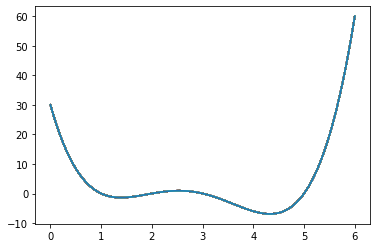

In [32]:
# Création du fichier, dpi : résolution, fps : images par secondes

ani.save(filename="descente.mp4", dpi =80, fps=20)

In [ ]:
%%html

<video width="800" height="400" controls="controls">
  <source src="descente.mp4" type="video/mp4" />
</video>